# Exploratory  Data Analysis

**Objective** : To identify the trends and analyze the factors affecting and influencing the crisis contacts made by the Seattle Police Departmnet. This can be used in improving and handling the crisis managemnet effectivey. 

##### Importing necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataframe

In [11]:
df=pd.read_csv("Crisis_Data.csv")
df.head()

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,546319,1900-01-01T00:00:00,00:00:00,03/23/2019 02:42:33 PM,911,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ASSIST OTHER AGENCY - COUNTY AGENCY,-,N,N,...,Two or More Races,1990,-1,N,NaN,NaN,NaN,North,BOY,B3
1,393200,1900-01-01T00:00:00,00:00:00,02/26/2018 12:29:35 AM,"TELEPHONE OTHER, NOT 911",PROPERTY - DAMAGE,--DISTURBANCE - OTHER,No Action Possible / Necessary,N,N,...,White,1991,-1,N,NaN,NaN,NaN,North,UNION,U2
2,78352,1900-01-01T00:00:00,00:00:00,09/01/2015 03:25:09 PM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Voluntary Committal,N,N,...,White,1982,-1,N,NaN,NaN,NaN,North,UNION,U2
3,315652,1900-01-01T00:00:00,00:00:00,10/07/2017 01:28:33 AM,911,"DISTURBANCE, MISCELLANEOUS/OTHER",--CRISIS COMPLAINT - GENERAL,No Action Possible / Necessary,N,N,...,Asian,1987,-1,N,NaN,NaN,NaN,East,CHARLIE,C2
4,508470,1900-01-01T00:00:00,00:00:00,12/02/2018 08:44:38 AM,911,DIST - DV - NO ASLT,--CRISIS COMPLAINT - GENERAL,Resources Declined,N,N,...,White,1986,-1,N,NaN,NaN,NaN,West,QUEEN,Q3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70928 entries, 0 to 70927
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Template ID                  70928 non-null  int64 
 1   Reported Date                70928 non-null  object
 2   Reported Time                70928 non-null  object
 3   Occurred Date / Time         70928 non-null  object
 4   Call Type                    70928 non-null  object
 5   Initial Call Type            70928 non-null  object
 6   Final Call Type              70928 non-null  object
 7   Disposition                  70928 non-null  object
 8   Use of Force Indicator       70928 non-null  object
 9   Subject Veteran Indicator    70928 non-null  object
 10  CIT Officer Requested        70928 non-null  object
 11  CIT Officer Dispatched       70928 non-null  object
 12  CIT Officer Arrived          70928 non-null  object
 13  Officer ID                   70

##### Displaying Unique values in respective columns 

In [13]:
df.nunique()

Template ID                    69990
Reported Date                   2527
Reported Time                      1
Occurred Date / Time           63985
Call Type                          9
Initial Call Type                175
Final Call Type                  210
Disposition                       30
Use of Force Indicator             2
Subject Veteran Indicator          2
CIT Officer Requested              2
CIT Officer Dispatched             2
CIT Officer Arrived                2
Officer ID                      1259
Officer Gender                     3
Officer Race                       9
Officer Year of Birth             53
Officer Years of Experience       82
CIT Certified Indicator            2
Officer Bureau Desc                6
Officer Precinct Desc             25
Officer Squad Desc               182
Precinct                           8
Sector                            18
Beat                              54
dtype: int64

Inferences:

We can see that the columns Template ID, Reported Date has 69930, 2525 unique values respectively

In [16]:
#printing the shape of the dataframe
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(70928, 25)
Number of rows: 70928
Number of columns: 25


#### Null Values in Dataset

In [17]:
#Displaying null values in the dataset with respect to the columns
df.isna().sum()

Template ID                       0
Reported Date                     0
Reported Time                     0
Occurred Date / Time              0
Call Type                         0
Initial Call Type                 0
Final Call Type                   0
Disposition                       0
Use of Force Indicator            0
Subject Veteran Indicator         0
CIT Officer Requested             0
CIT Officer Dispatched            0
CIT Officer Arrived               0
Officer ID                        0
Officer Gender                    0
Officer Race                      0
Officer Year of Birth             0
Officer Years of Experience       0
CIT Certified Indicator           0
Officer Bureau Desc            5748
Officer Precinct Desc          6088
Officer Squad Desc             5699
Precinct                          0
Sector                            0
Beat                              0
dtype: int64

Inferences: 

The columns Officer Bureau Desc, Officer Precinct Desc, Officer Squad Desc has 5742, 6085, 5696 null values respectively.

##### Summary of numerical columns

In [18]:
#Displaying summary of numerical columns
df.describe()

,Template ID,Officer Year of Birth,Officer Years of Experience
count,7.092800e+04,70928.000000,70928.000000
mean,8.089804e+09,1982.190982,8.074724
std,1.068101e+10,10.796279,9.923349
min,4.346900e+04,1900.000000,-48.000000
25%,2.567618e+05,1976.000000,2.000000
50%,5.010235e+05,1985.000000,4.000000
75%,1.465038e+10,1990.000000,11.000000
max,3.274825e+10,2000.000000,80.000000


Inferences: 
    
We can see that the number of Years of experiene of Officers is 80. The officers also has years of births ranging from 1900 to 2000.

In [19]:
#Displaying the description of all columns
df.describe(include = 'all')

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
count,7.092800e+04,70928,70928,70928,70928,70928,70928,70928,70928,70928,...,70928,70928.000000,70928.000000,70928,65180,64840,65229,70928,70928,70928
unique,NaN,2527,1,63985,9,175,210,30,2,2,...,9,NaN,NaN,2,6,25,182,8,18,54
top,NaN,2021-05-21T00:00:00,00:00:00,01/01/1900 12:00:00 AM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,N,N,...,White,NaN,NaN,N,OPERATIONS BUREAU,WEST PCT,TRAINING - FIELD TRAINING SQUAD,West,KING,-
freq,NaN,52,70928,5501,47926,12667,49609,21714,69772,69263,...,48535,NaN,NaN,38754,57864,17190,6449,19162,6675,5833
mean,8.089804e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982.190982,8.074724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.068101e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.796279,9.923349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.346900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1900.000000,-48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.567618e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1976.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.010235e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1985.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.465038e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1990.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inferences: 

The statistics of all the columns are displayed.

##### Displaying the crisis counts of Reported Date with repect to the months & years

In [21]:
df['Reprted_Year']=pd.to_datetime(df['Reported Date']).dt.year
df['Reported_Month']=pd.to_datetime(df['Reported Date']).dt.month

Text(0, 0.5, 'Count')

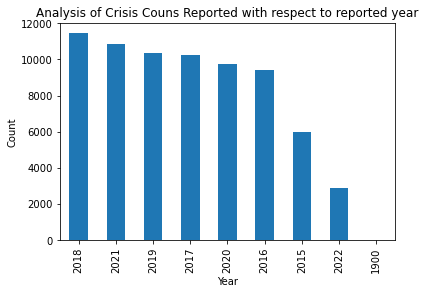

In [27]:
df['Reprted_Year'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Couns Reported with respect to reported year')
plt.xlabel('Year')
plt.ylabel('Count')

Inferences:

We can see that most of the most of the crisis are reported in 2018 and least in 2022. 

Text(0, 0.5, 'Count')

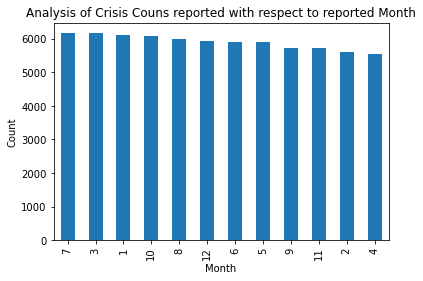

In [28]:
df['Reported_Month'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Couns reported with respect to reported Month')
plt.xlabel('Month')
plt.ylabel('Count')

Inferences:

We can see that most of the most of the crisis are reported in month of July and least in April. 

##### Displaying the counts of Occurred Date / Time with repect to the months & years

In [31]:
df['Occurred_Year']=pd.to_datetime(df['Occurred Date / Time']).dt.year
df['Occurred_Month']=pd.to_datetime(df['Occurred Date / Time']).dt.month

Text(0, 0.5, 'Count')

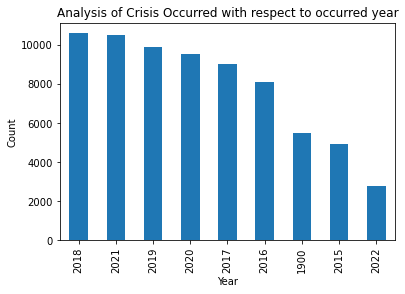

In [32]:
df['Occurred_Year'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Occurred with respect to occurred year')
plt.xlabel('Year')
plt.ylabel('Count')

Inferences:

We can see that most of the crisis Occurred Date / Time 2018 and least in  2022

Text(0, 0.5, 'Count')

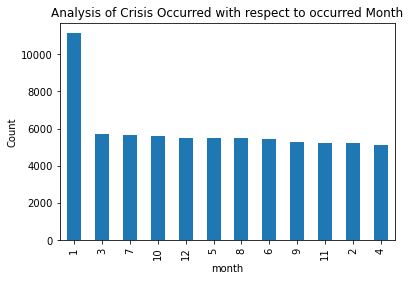

In [33]:
df['Occurred_Month'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Occurred with respect to occurred Month')
plt.xlabel('month')
plt.ylabel('Count')

Inferences:

We can see that most of the crisis Occurred in January and least in April

##### Converting CIT Certified Indicator from Categorical to Numerical

In [33]:
df['CIT Certified Indicator']=df['CIT Certified Indicator'].map({'N':0,'Y':1})

##### Plotting the graph of CIT Certified Indicator with respect to the Reprted_Year

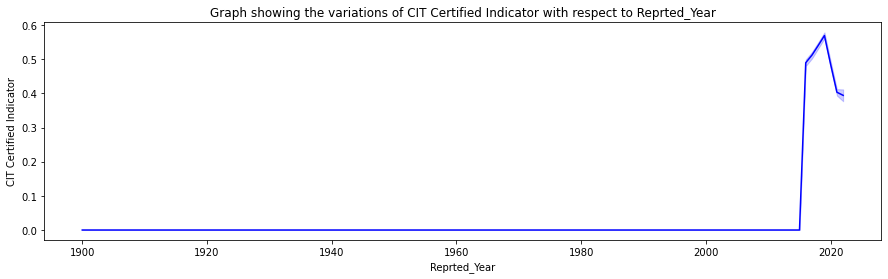

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Reprted_Year',y='CIT Certified Indicator', data =df, color = 'b')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Reprted_Year")
plt.xlabel("Reprted_Year")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Occurred_Year

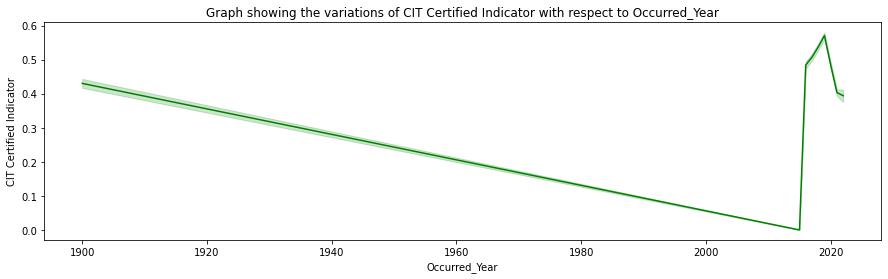

In [21]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Occurred_Year',y='CIT Certified Indicator', data =df, color = 'g')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Occurred_Year")
plt.xlabel("Occurred_Year")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Reprted_Month

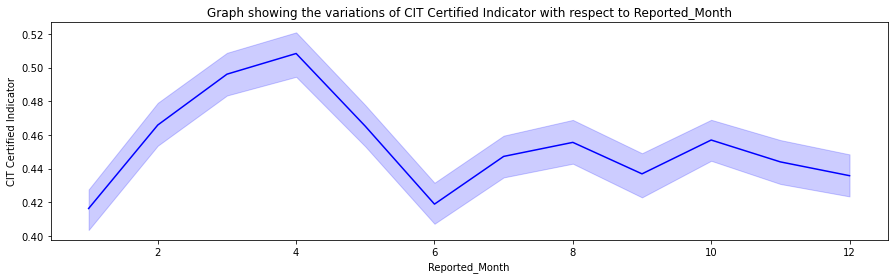

In [35]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Reported_Month',y='CIT Certified Indicator', data =df, color = 'b')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Reported_Month")
plt.xlabel("Reported_Month")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Occurred_Month

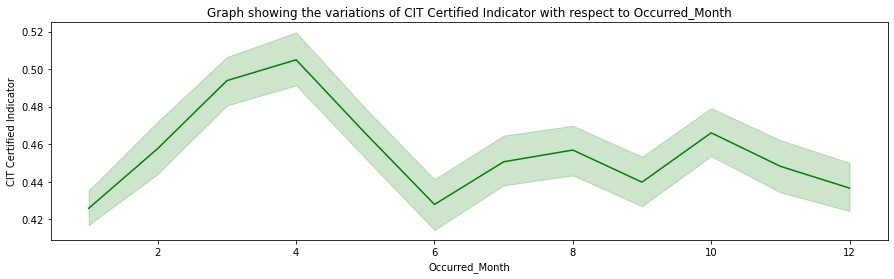

In [27]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Occurred_Month',y='CIT Certified Indicator', data =df, color = 'g')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Occurred_Month")
plt.xlabel("Occurred_Month")
plt.show()

Inferences:

Based on comparision with Months and Years on both Occurred Date / Time and Reported Date happen in same timespan

#### Plotting the graph of CIT Certified Indicator with  Officer Years of Experience

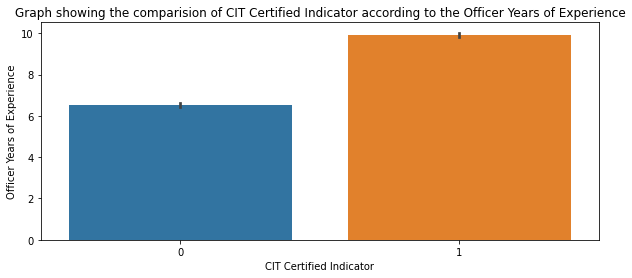

In [28]:

plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of CIT Certified Indicator according to the Officer Years of Experience")
plt.xlabel("CIT Certified Indicator")
sns.barplot(df['CIT Certified Indicator'],df['Officer Years of Experience'])

Inferences:
CIT Certified Indicator =1  is high based on Officer Years of Experience

 ##### Plotting the graph that compares the CIT Certified Indicator with Officer Years of Experience and Officer Gender

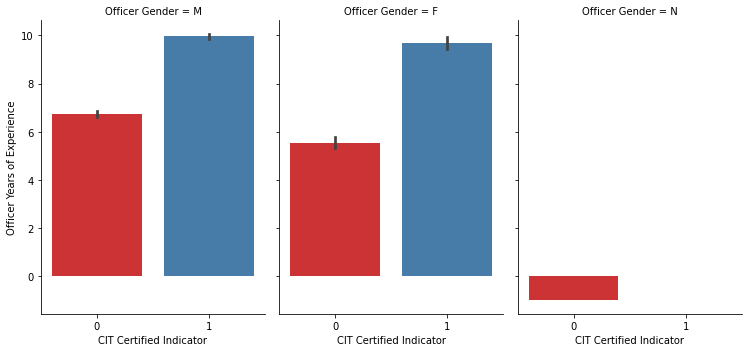

In [29]:
sns.catplot(x='CIT Certified Indicator',y='Officer Years of Experience', col = 'Officer Gender', data=df,
                kind='bar', aspect=.7, palette='Set1') 

Inferences:

Based on Properties and Gender Ratio CIT Certified Indicator =1 is high 
and if we understand Graph  Officer Gender='N'  having -ve Years of Experiance (but years of experiance must positive)

 ##### Plotting the graph of Officer Gender with Officer Years of Experience

<AxesSubplot:title={'center':'Graph showing the comparision of Officer Gender according to the Officer Years of Experience'}, xlabel='Officer Gender', ylabel='Officer Years of Experience'>

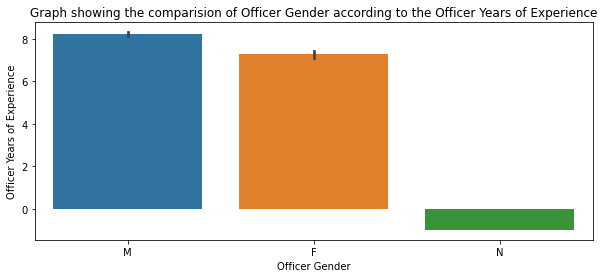

In [35]:
plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of Officer Gender according to the Officer Years of Experience")
plt.xlabel("Officer Gender")
sns.barplot(df['Officer Gender'],df['Officer Years of Experience'])

 ##### Plotting the graph that compares the Sector with Officer Years of Experience 

<AxesSubplot:title={'center':'Graph showing the comparision of Officer Sector according to the Officer Years of Experience'}, xlabel='Sector', ylabel='Officer Years of Experience'>

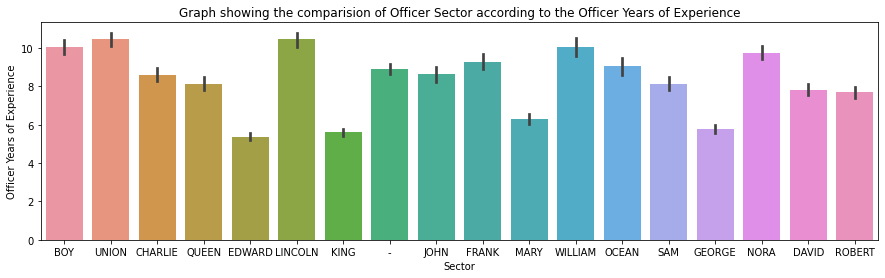

In [36]:
plt.figure(figsize=(15,4))
plt.title("Graph showing the comparision of Officer Sector according to the Officer Years of Experience")
plt.xlabel("Sector")
sns.barplot(df['Sector'],df['Officer Years of Experience'])

Inferences:
    
Based on Graph UNION and LINCLON sector officers having highest years

 ##### Plotting the graph that compares the Officer Gender with Reported_Month

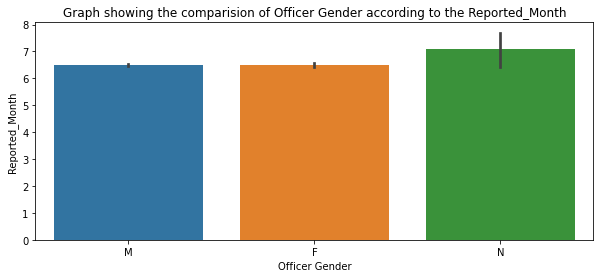

In [64]:
plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of Officer Gender according to the Reported_Month")
plt.xlabel("Officer Gender")
sns.barplot(df['Officer Gender'] ,df['Reported_Month'])

Inferences:

Officer Gender with indicator N  having Highest Reporting Months then compare to Male and Female 

##### Plotting the bar garph for Call Type and its individual counts

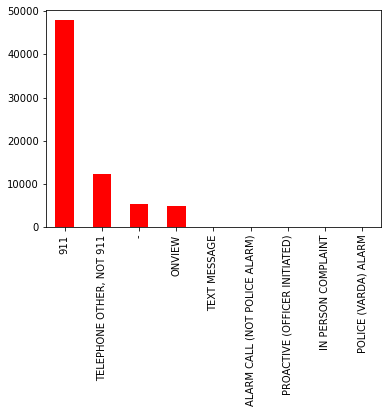

In [67]:
df['Call Type'].value_counts().plot(kind='bar', color='r')

Inferences:
    
We can see that here 9 indidual indicators in the indicator 911 has highest 47884 values

##### Plotting the bar garph for Disposition and its individual counts

Text(0, 0.5, 'Count')

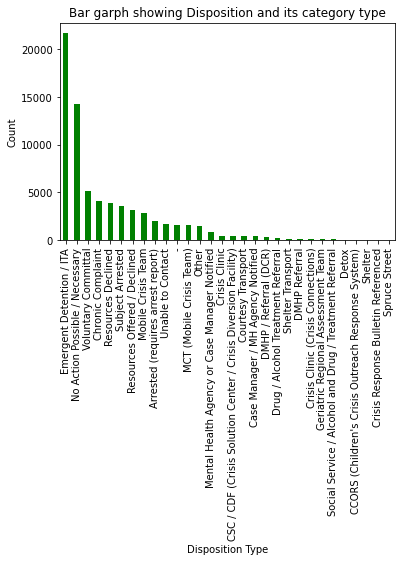

In [37]:
df['Disposition'].value_counts().plot(kind='bar', color='g')
plt.title('Bar garph showing Disposition and its category type')
plt.xlabel('Disposition Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 30 indidual indicators in the indicator Emergent Detention / ITA has highest 21700 values

##### Plotting the bar garph for Officer Race and its individual counts

Text(0, 0.5, 'Count')

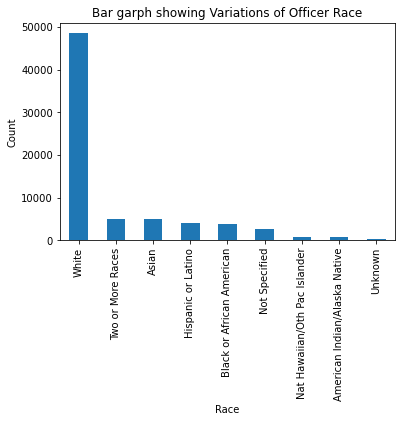

In [38]:
df['Officer Race'].value_counts().plot(kind='bar')
plt.title('Bar garph showing Variations of Officer Race')
plt.xlabel('Race')
plt.ylabel('Count')

Inferences:
    
We can see that here 9 indidual indicators in the indicator White has highest 48501 values

##### Plotting the bar garph for Officer Year of Birth and its individual counts

Text(0, 0.5, 'Count')

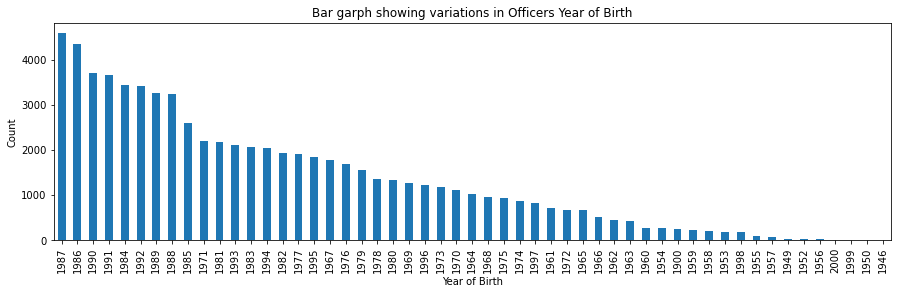

In [42]:
plt.figure(figsize=(15,4))
df['Officer Year of Birth'].value_counts().plot(kind='bar')
plt.title('Bar garph showing variations in Officers Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')

Inferences:
    
We can see that here 53 indidual years  in that  Year 1987  has highest 4577 values
Year range Between 1946 to 1987 (~41 years)

##### Plotting the bar garph for  Officer Bureau Desc and its individual counts

Text(0, 0.5, 'Count')

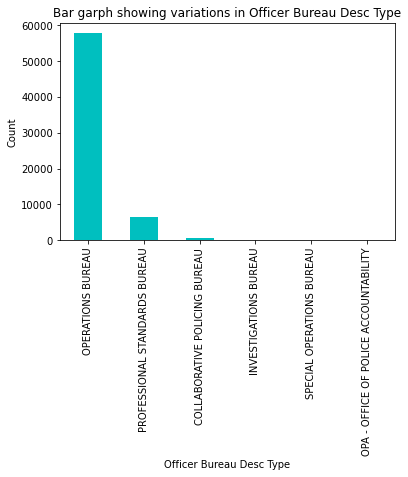

In [46]:
df['Officer Bureau Desc'].value_counts().plot(kind='bar',color='c')
plt.title('Bar garph showing variations in Officer Bureau Desc Type')
plt.xlabel('Officer Bureau Desc Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 6 indidual indicators in the indicator OPERATIONS BUREAU has highest 57817 values

##### Plotting the bar garph for Officer Precinct Desc and its individual counts

Text(0, 0.5, 'Count')

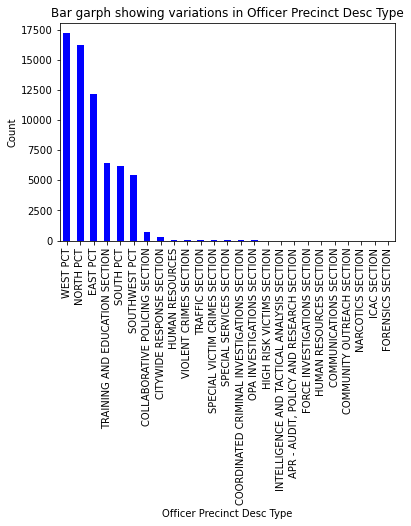

In [47]:
df['Officer Precinct Desc'].value_counts().plot(kind='bar',color='b')
plt.title('Bar garph showing variations in Officer Precinct Desc Type')
plt.xlabel('Officer Precinct Desc Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 25 indidual indicators in the indicator WEST PCT has highest 17171 values

##### Plotting the bar garph for Sector and its individual counts

Text(0, 0.5, 'Count')

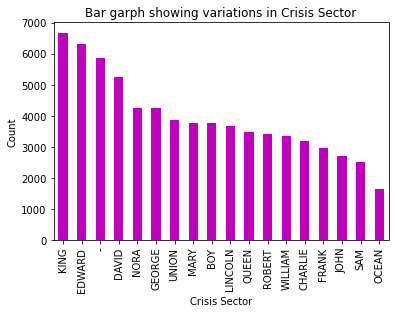

In [48]:
df['Sector'].value_counts().plot(kind='bar',color='m')
plt.title('Bar garph showing variations in Crisis Sector')
plt.xlabel('Crisis Sector')
plt.ylabel('Count')

Inferences:
    
We can see that here 18 indidual indicators in the indicator KING has highest   6668 values

##### Plotting the bar garph for Beat and its individual counts

Text(0, 0.5, 'Count')

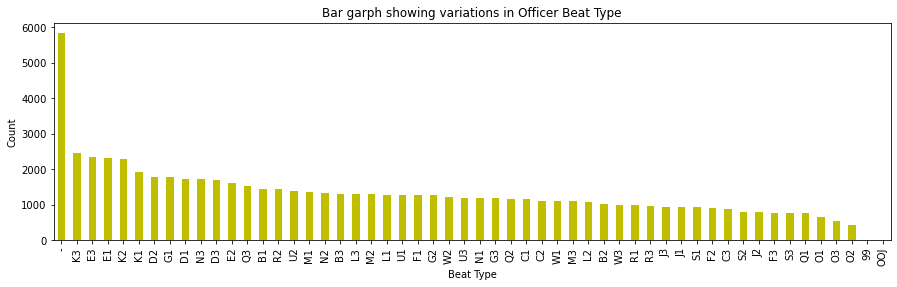

In [50]:
plt.figure(figsize=(15,4))
df['Beat'].value_counts().plot(kind='bar', color='y')
plt.title('Bar garph showing variations in Officer Beat Type')
plt.xlabel('Beat Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 54 indidual indicators in the indicator K3  has highest values

**Explorative Data Analysis Outcomes:**

1.Officer Year of Birth --> Range Between 1946 to 1987 (~41 years)

2.Officer Years of Experience --> Having -ve Values but experiance must + ve 

3.Most of the Reprted_Year and Occurred_Year comes under same time span (2018 to 2022) 
  Highest in 2018 and lowerst in 2022

4.All the -ve years of experiance comes under Gender=N 

5.Male having highest years of experiance then compare to female

6.Officer Gender =N  having Highest Reporting Months then compare to Male and Female 

7.CIT Certified Indicator is Active after 2016 (Reported Year Range b/w 1900 -2020)

8.April month highest CIT Certified Indicator values occured 